# 🏠 House Hunter: Regression and Stacking (Top 3%)

Welcome to my notebook on predicting house prices using regression analysis! In this project, I will be exploring a dataset of housing prices and using machine learning techniques to build a predictive model that can estimate the value of a residential property based on a variety of features.

Housing prices can be affected by many factors, including location, size, age, and condition of the property, as well as economic and demographic trends in the surrounding area. By analyzing a large dataset of home sales and identifying patterns in these factors, we can gain insights into what drives real estate values and use this knowledge to make accurate predictions of future prices.

I hope you find this notebook helpful and informative in your own exploration of regression analysis andpredictive modeling for real estate data. Let's get started!

# Modules

First, let's import the modules that we'll be using in this notebook. 

In [1]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import StackingRegressor
from sklearn.preprocessing import MinMaxScaler

import xgboost

# Dataset

Great! Now we're ready to dive into our dataset. Let's see what we have here.

In [2]:
#read data
test = pd.read_csv("../data/test.csv")
train = pd.read_csv("../data/train.csv")

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train.shape, test.shape

((1460, 81), (1459, 80))

Our dataset contains a large number of variables - nearly 80 features - for a dataset that is not considered large. To ensure that our analysis is focused and efficient, we may need to remove some of the less useful variables. However, before we do so, let's first combine the training and testing datasets to get an overview of the entire dataset. This will give us a better sense of the relationships between variables and help us identify any potential issues with the data that may need to be addressed before modeling.

In [6]:
#combine training and testing dataset
data = pd.concat(objs=[train, test], axis=0).reset_index(drop=True)
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

We have identified several variables with missing values in our dataset. To prepare the data for analysis, we will need to carefully consider the most appropriate method of imputation for each variable. Additionally, we have observed a mixed range of datatypes in our dataset. To ensure that our analysis is accurate and reliable, we will need to cross-check the data description and confirm that each variable is in the correct datatype.

In [8]:
#check number of missing values
#pd.set_option("display.max_rows", None, "display.max_columns", None)
data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64

# EDA (Exploratory Data Analysis)

Okay, now that we have a general sense of the dataset we have at hand, let's try to visualize our dataset. We'll start with our target variable: *SalePrice*.

## SalePrice

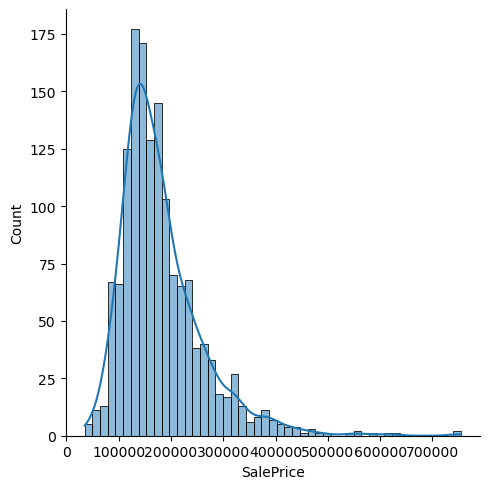

In [9]:
sns.displot(data['SalePrice'], kind='hist', kde=True)

In [10]:
#skewness and kurtosis
print("Skewness: ", data['SalePrice'].skew())
print("Kurtosis: ", data['SalePrice'].kurt())

Skewness:  1.8828757597682129
Kurtosis:  6.5362818600645305


Observing the distribution of our target variable, we can see that it is right-skewed. We may need to normalize this distribution later. We have a lot of variables, so let's move on. I've categorized all of the variables into four categories so they can be better visualized and processed. The four categories are: 

* **Categorical Variables**
* **Numerical Variables**
* **Ordinal Variables**
* **Time Variables**

This step took me a while, but it's absolutely necessary so we can perform the appropriate preprocessing. This in-depth exploration also presented me with some fascinating insights, so it's definitely not a waste of time. Let's take a look!

In [11]:
#categorize all variables into four categories
categorical_variables = ["MSSubClass", "MSZoning", "Street", "Alley", "LotShape", "LandContour", "LotConfig", "Utilities", "LandSlope", "Neighborhood",
                        "Condition1", "Condition2", "BldgType", "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "Foundation",
                        "Heating", "CentralAir", "Electrical", "Functional", "GarageType", "GarageFinish", "PavedDrive", "MiscFeature", "SaleType", "SaleCondition",
                        "Fence", "MoSold"]

ordinal_variables = ["OverallQual", "OverallCond", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "HeatingQC",
                    "KitchenQual", "FireplaceQu", "GarageQual", "GarageCond", "PoolQC"]

numerical_variables = ["LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
                      "GrLivArea", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces", "GarageCars",
                      "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal"]

time_variable = ["YearBuilt", "YearRemodAdd", "GarageYrBlt", "YrSold"]

## Categorical Variables

We'll start with the categorical variables. To visualize categorical variables, I like to start out with countplots for univariate visualizations and boxplots for bivariate visualizations with a numerical variable. Our target variable, *SalePrice*, is a numerical variable, so let's just cut to the chase with boxplots. To save time, let' plot all the variables out at the same time.

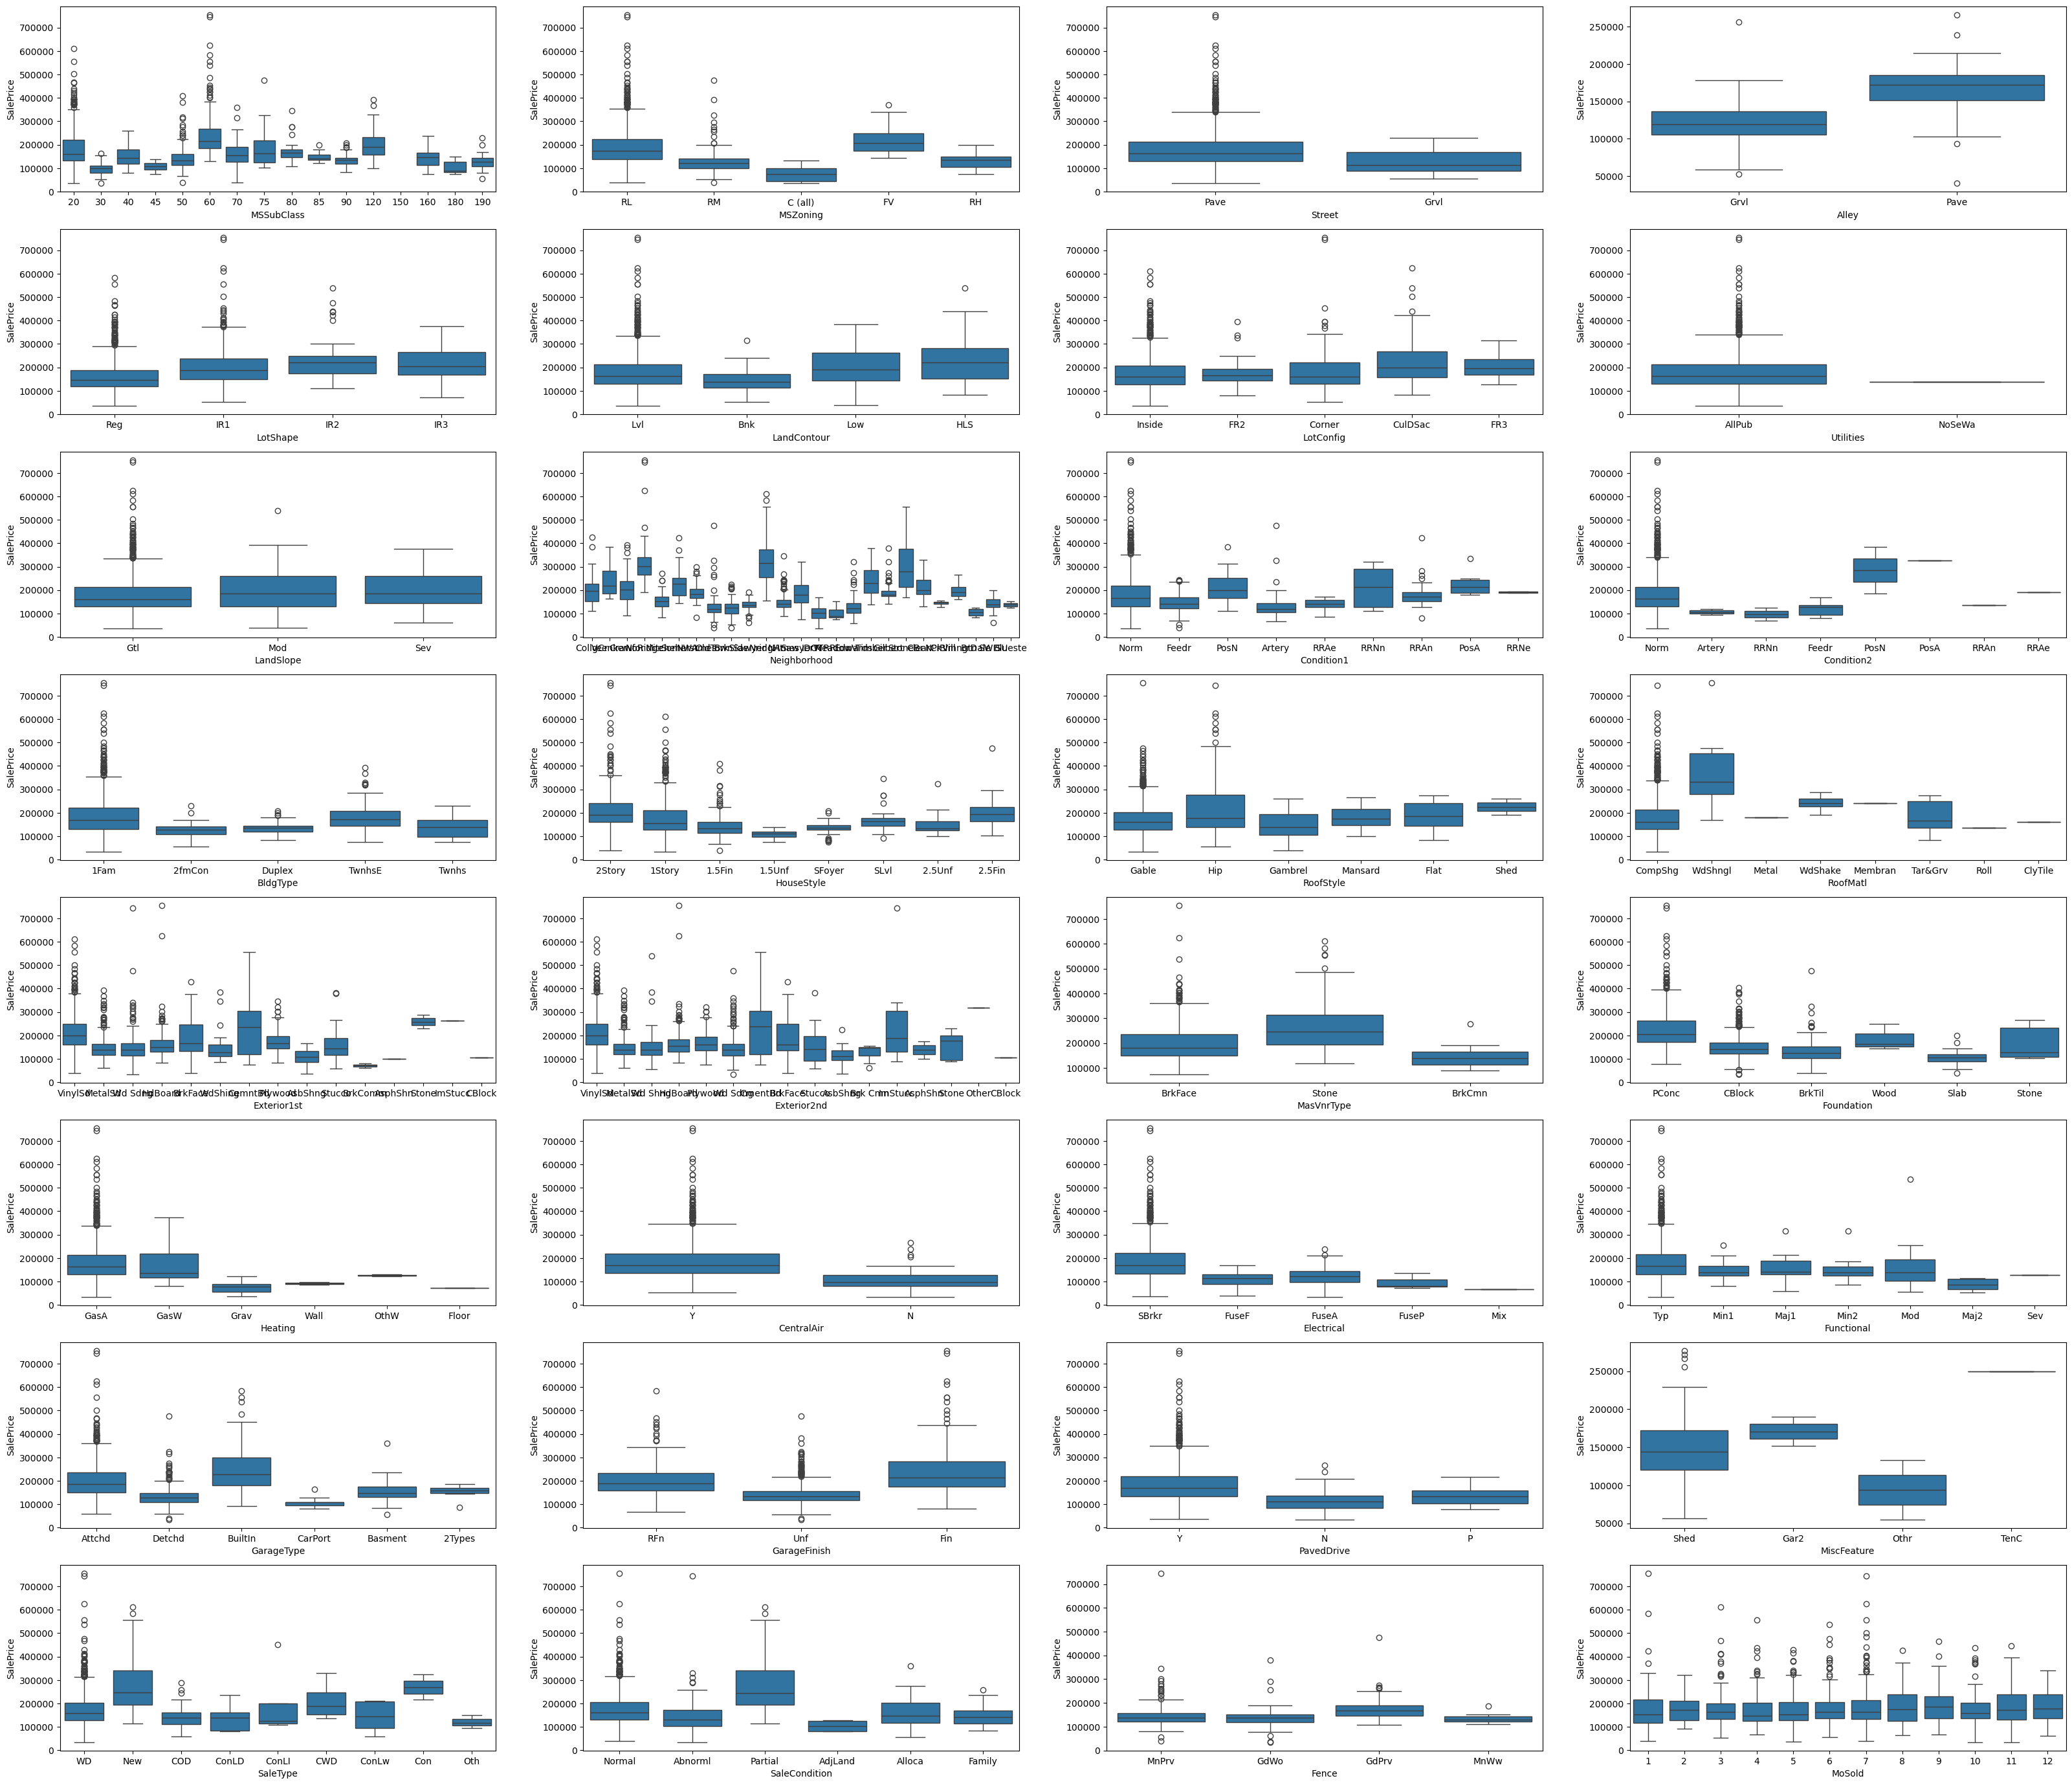

In [12]:
fig, ax = plt.subplots(8, 4, figsize=(40,35))

i=0
for r in range(8):
    for c in range(4):     
        sns.boxplot(ax=ax[r, c], x=categorical_variables[i], y='SalePrice', data=data)
        i+=1
    
plt.show()

There's a lot we can see from this graph. Due to the vast amount of subplots we tried to squish into this space, some words were crammed together. But since we're only trying to get a good initial idea of the relationship between these categorical variables and *SalePrice*, we'll ignore them for now. There's too much to cover here, so I'll only list down a few of the insights that I observed. Feel free to comment more if you saw anything interesting that I didn't mention.

- Paved street and alley access (*Street* and *Alley*) tends to lead to more expensive homes.
- Homes with central aired conditioning are more expensive (*CentralAir*)
- The most expensive homes use gas forced warm air furnace (*GasA*) (*Heating*)

If you're unclear with the definition of these values and variables, you may refer to the *data_description.txt* file. It contains a detailed description for each variable and their corresponding values.

## Ordinal Variables

Let's move on to ordinal variables. We'll visualize ordinal variables the same way we did for categorical variables with boxplots. They both describe qualitative traits, but ordinal variables are ranked and ordered in a meaningful way. So we might expect to see some more trends here. 

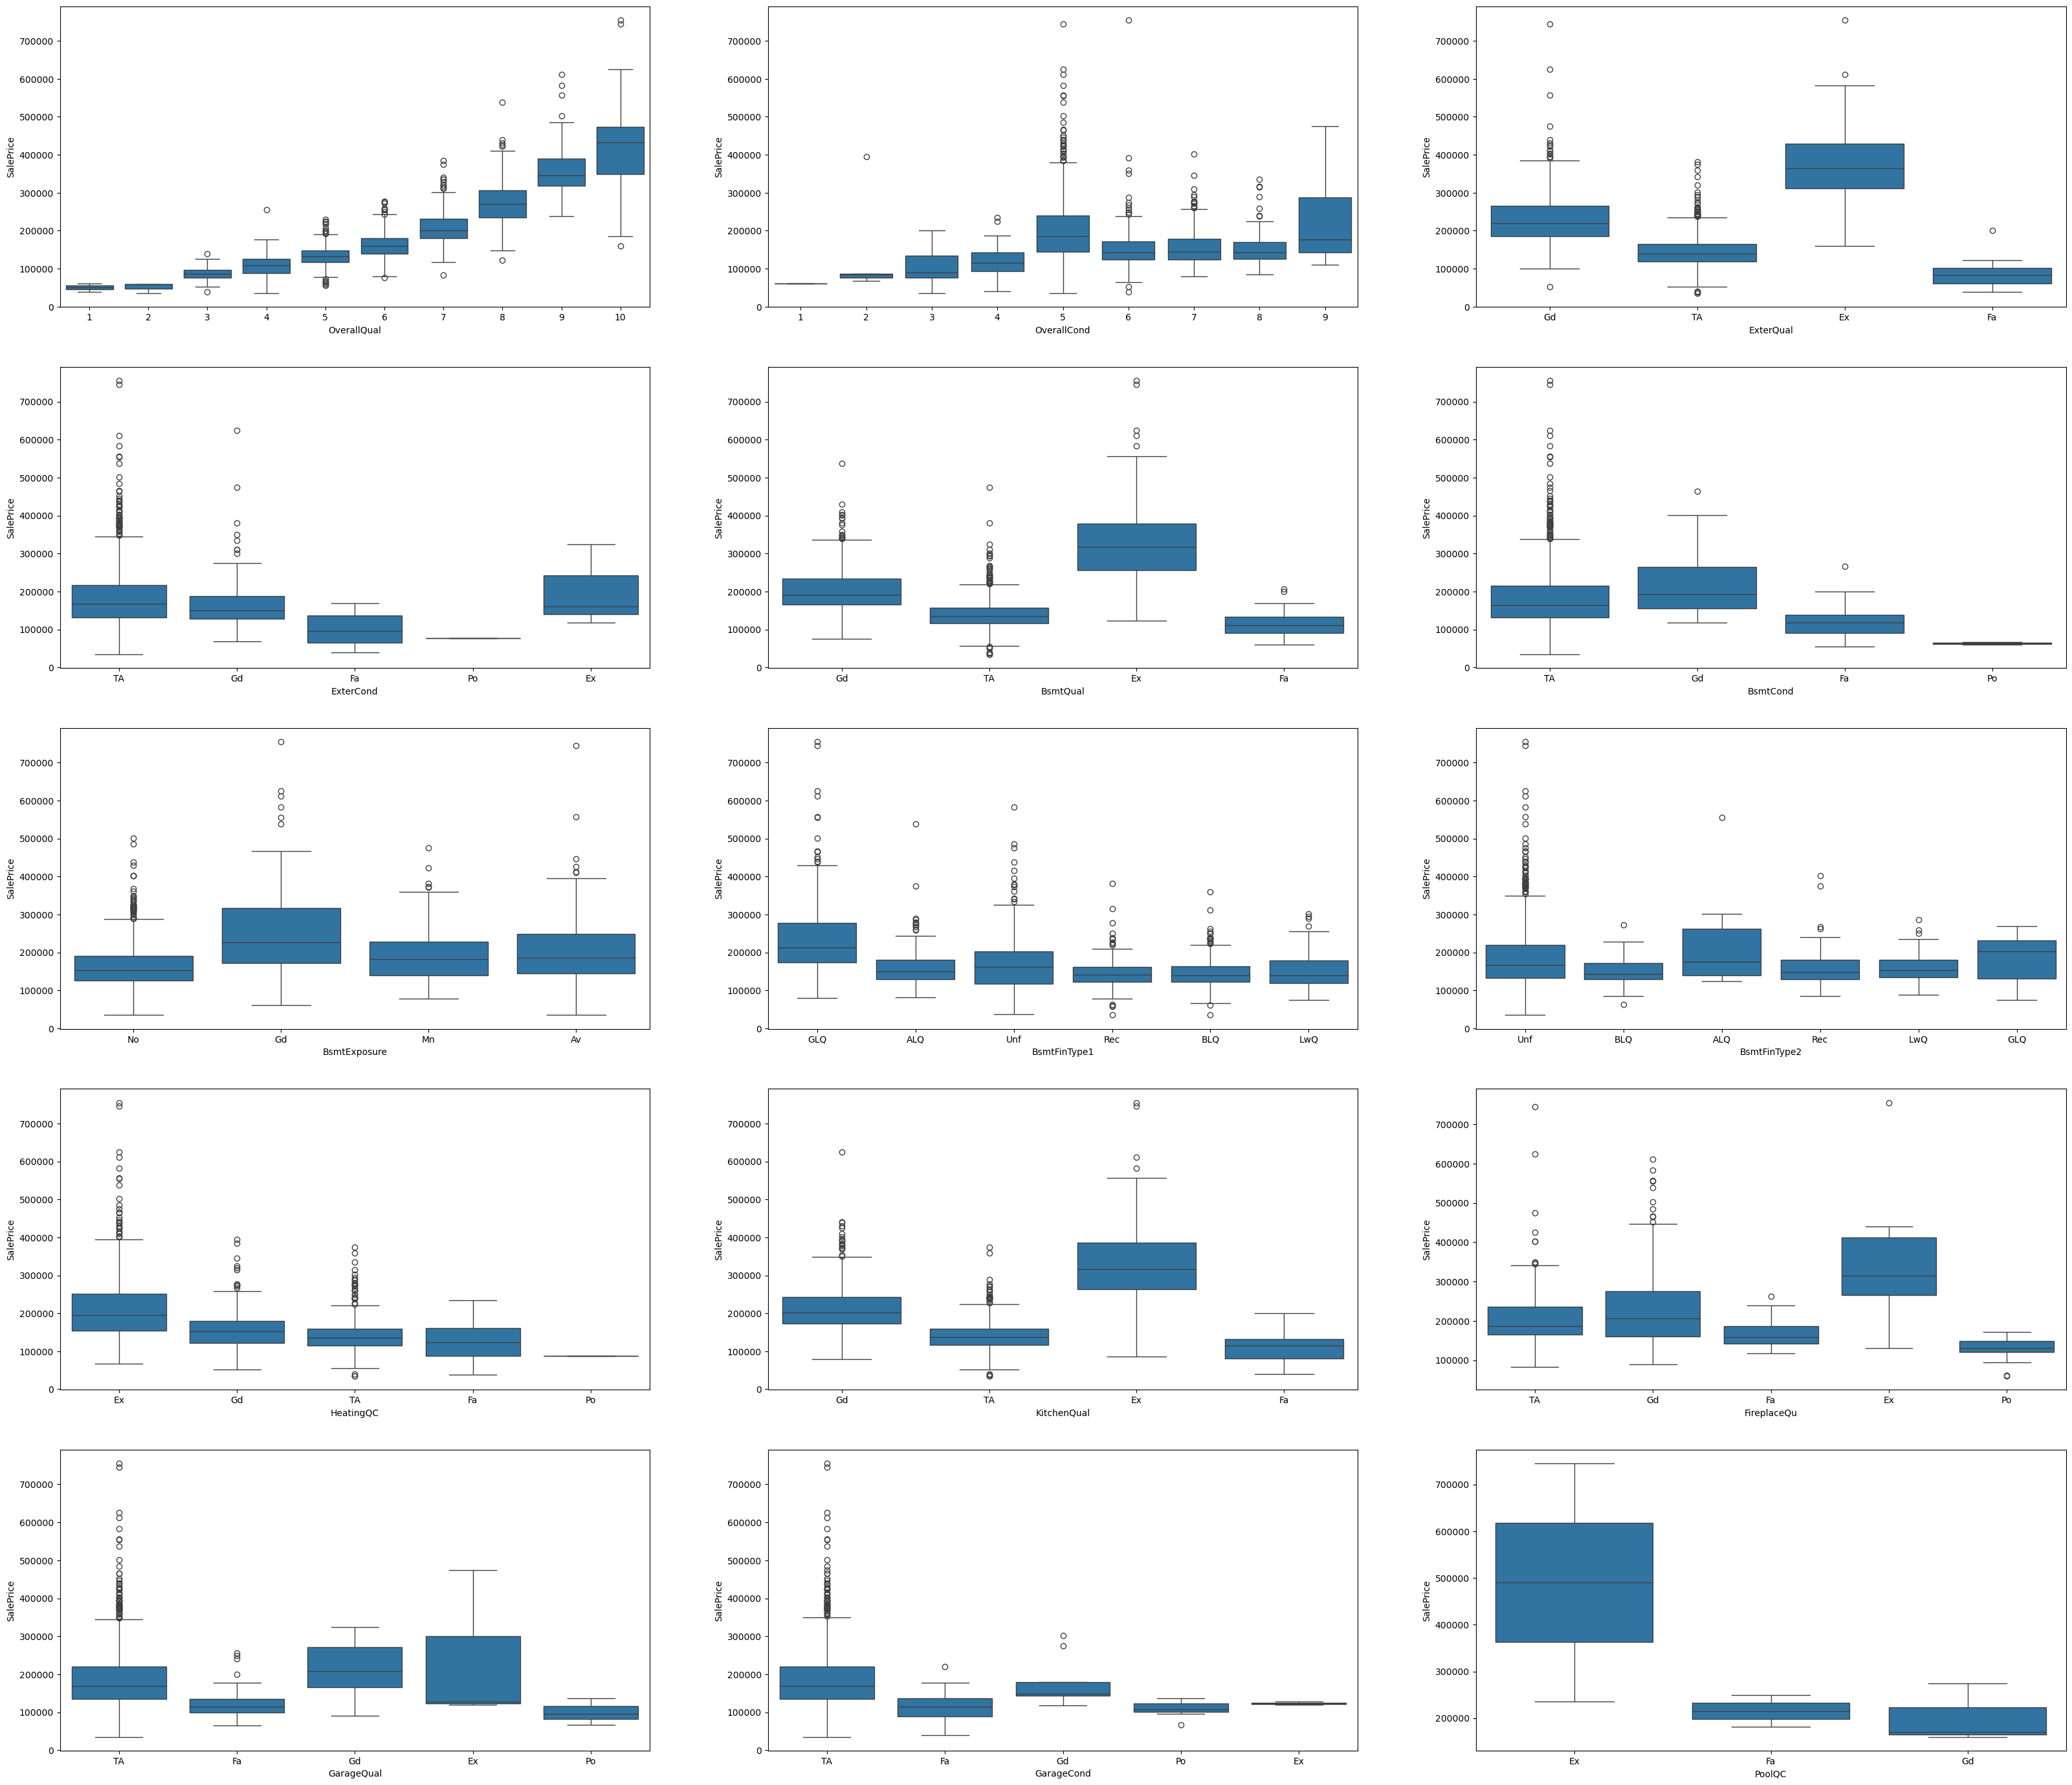

In [13]:
fig, ax = plt.subplots(5, 3, figsize=(40,35))

i=0
for r in range(5):
    for c in range(3):     
        sns.boxplot(ax=ax[r, c], x=ordinal_variables[i], y='SalePrice', data=data)
        i+=1
    
plt.show()

Wow, would you look at that! Again, we see some interesting trends here. For instance:

- There is positive relationship between *SalePrice* and *OverallQual*
- The most expensive homes mostly have a *OverallCond* of 5. 
- Homes with excellent (*Ex*) pool quality  (*PoolQC*) are more expensive

I think most of these trends are self-explanatory, but isn't it cool to actually visualize it? Again, feel free to list out or comment anything you see that are interesting. 

## Numerical Variables

Next, we'll move on to visualize numerical variables. To capture the relationship between two numerical variables, we can use scatterplots. Let's see if we can uncover anything insightful.

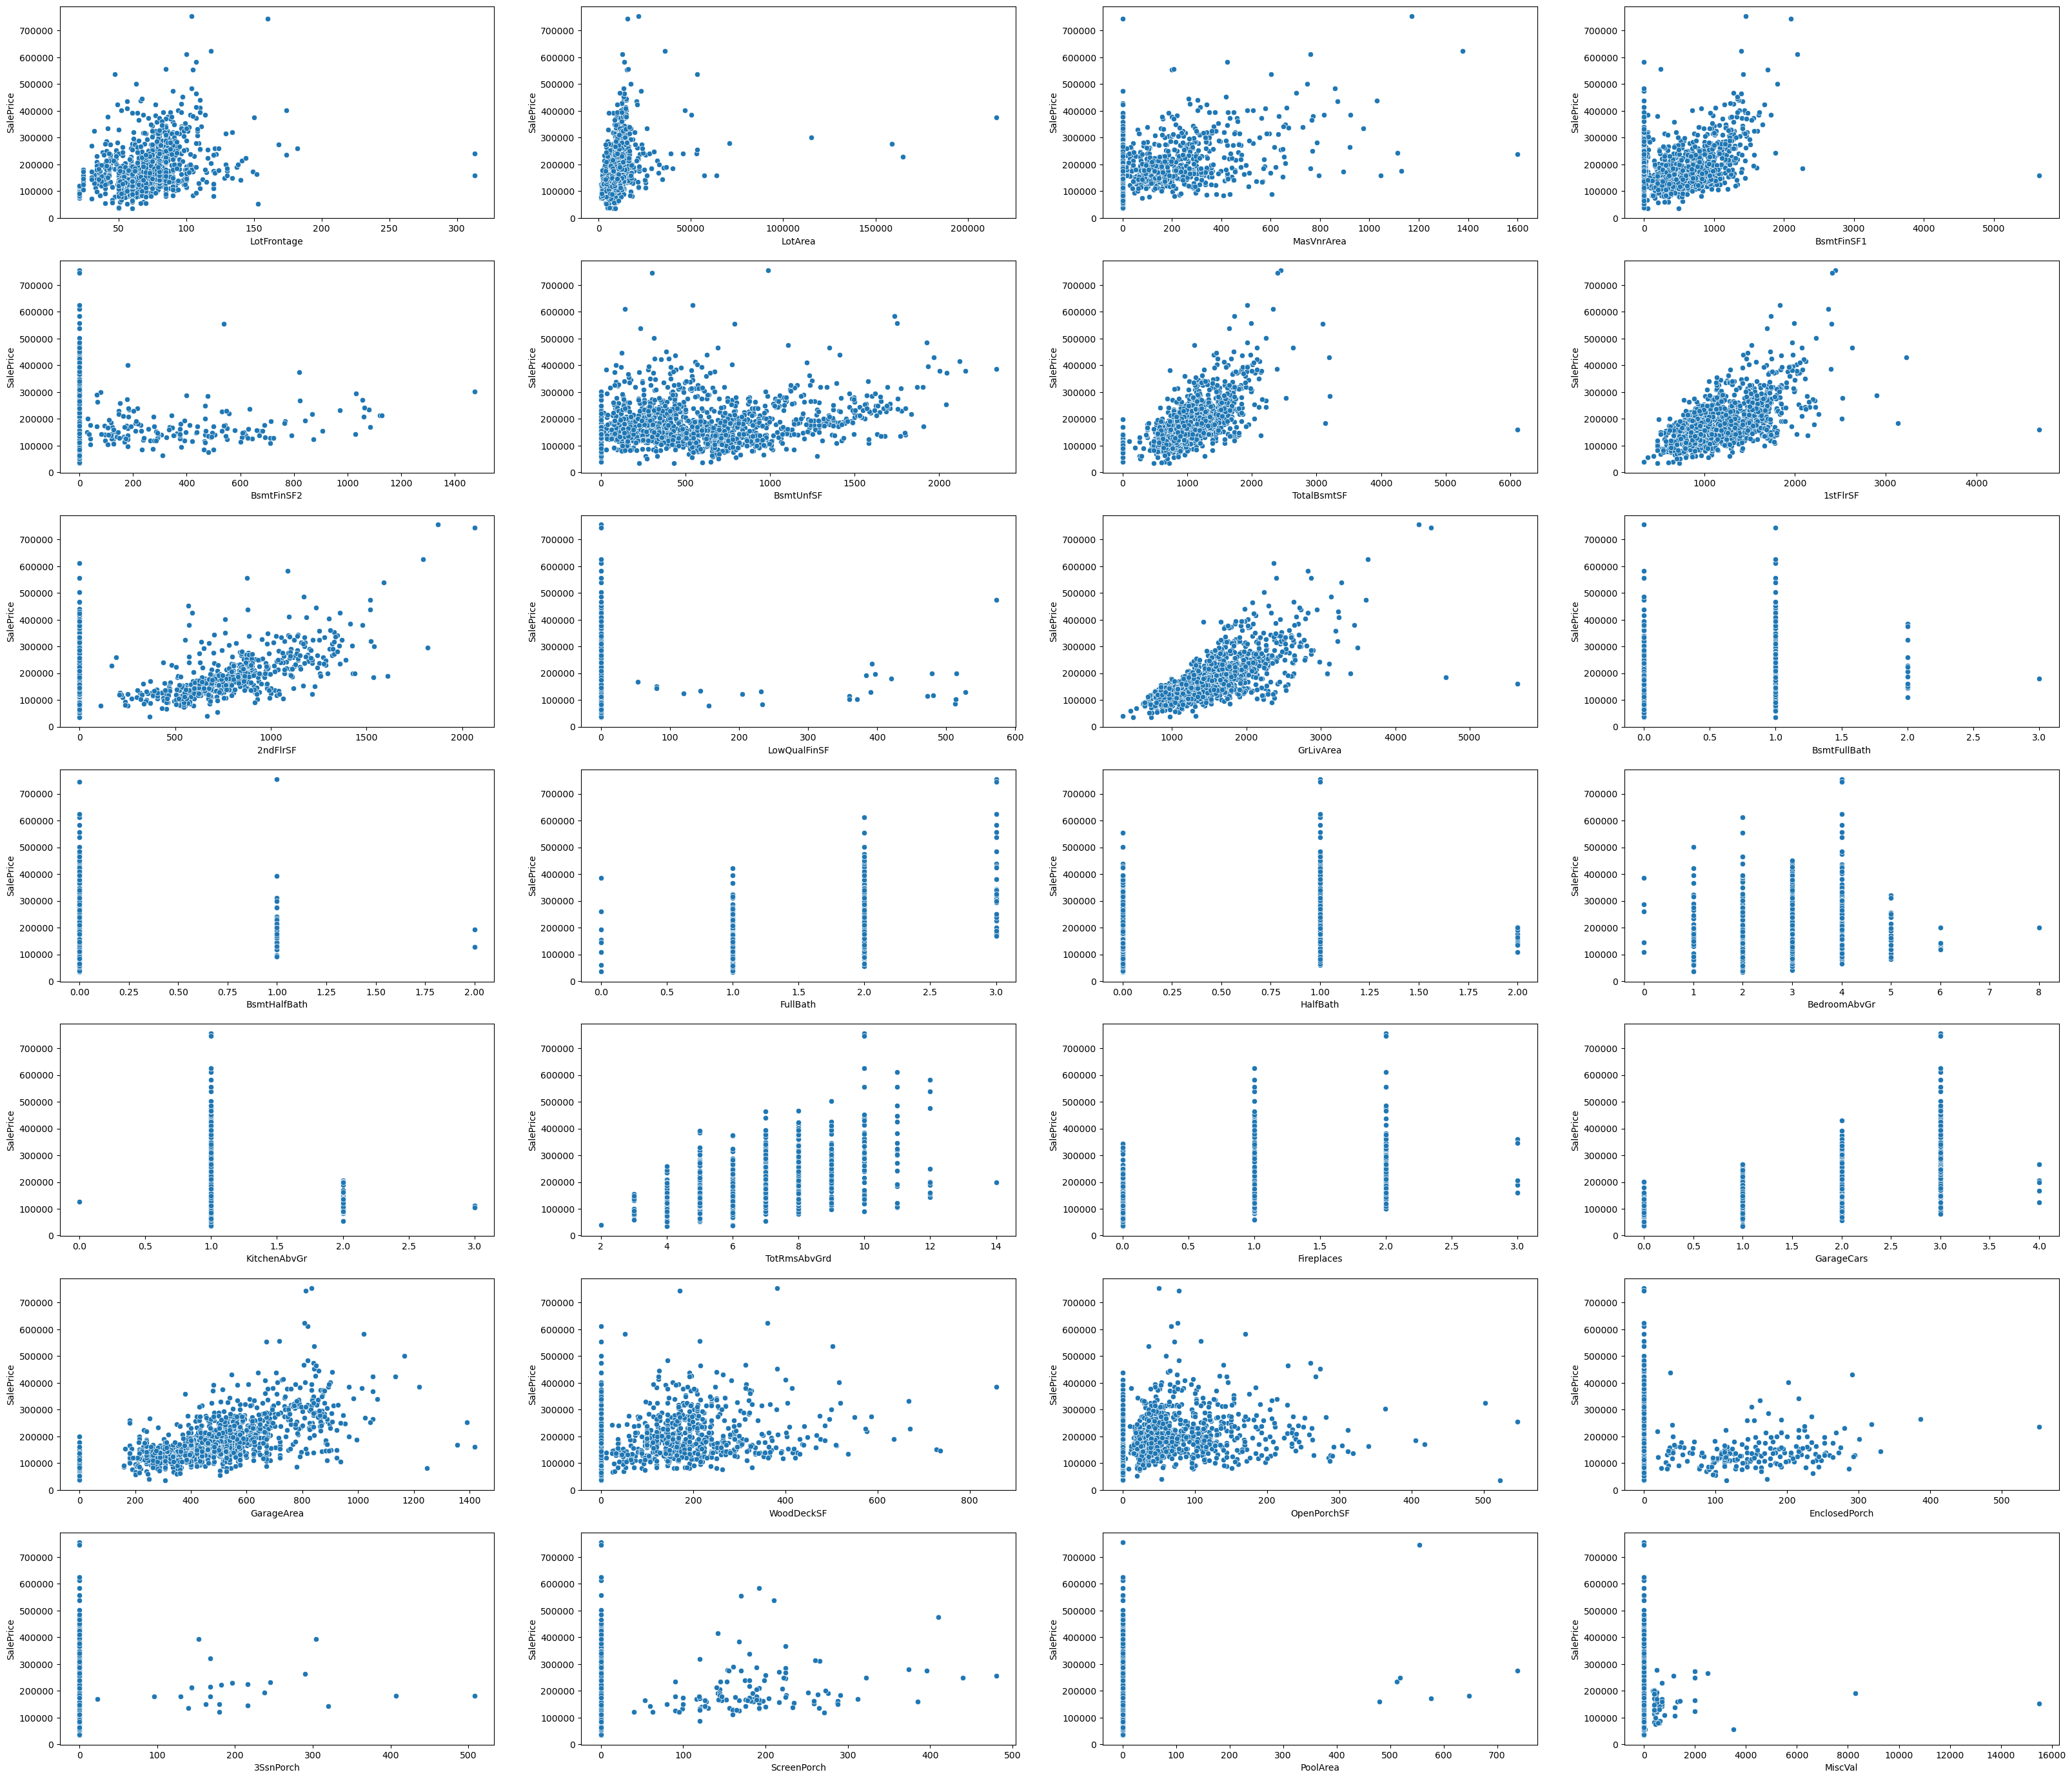

In [14]:
fig, ax = plt.subplots(7, 4, figsize=(40,35))

i=0
for r in range(7):
    for c in range(4):     
        sns.scatterplot(ax=ax[r, c], x=numerical_variables[i], y='SalePrice', data=data)
        i+=1
    
plt.show()

Wow! Right off the bat, we observe many positive correlations between numerous numerical variable and *SalePrice*. The area size (variables ending with *SF*) of the home appears to be very much correlated with the *SalePrice*. The number of bathrooms (*FullBath*), fireplaces (*Fireplaces*) and size of garage (*GarageCars*) also display a positive correlation. What else do you see? Feel free to comment below.

## Time Variable

Finally, we're at our final cateogory, time variables. We'll use line plots to graph out how *SalePrice* is distributed across each of these time variables.

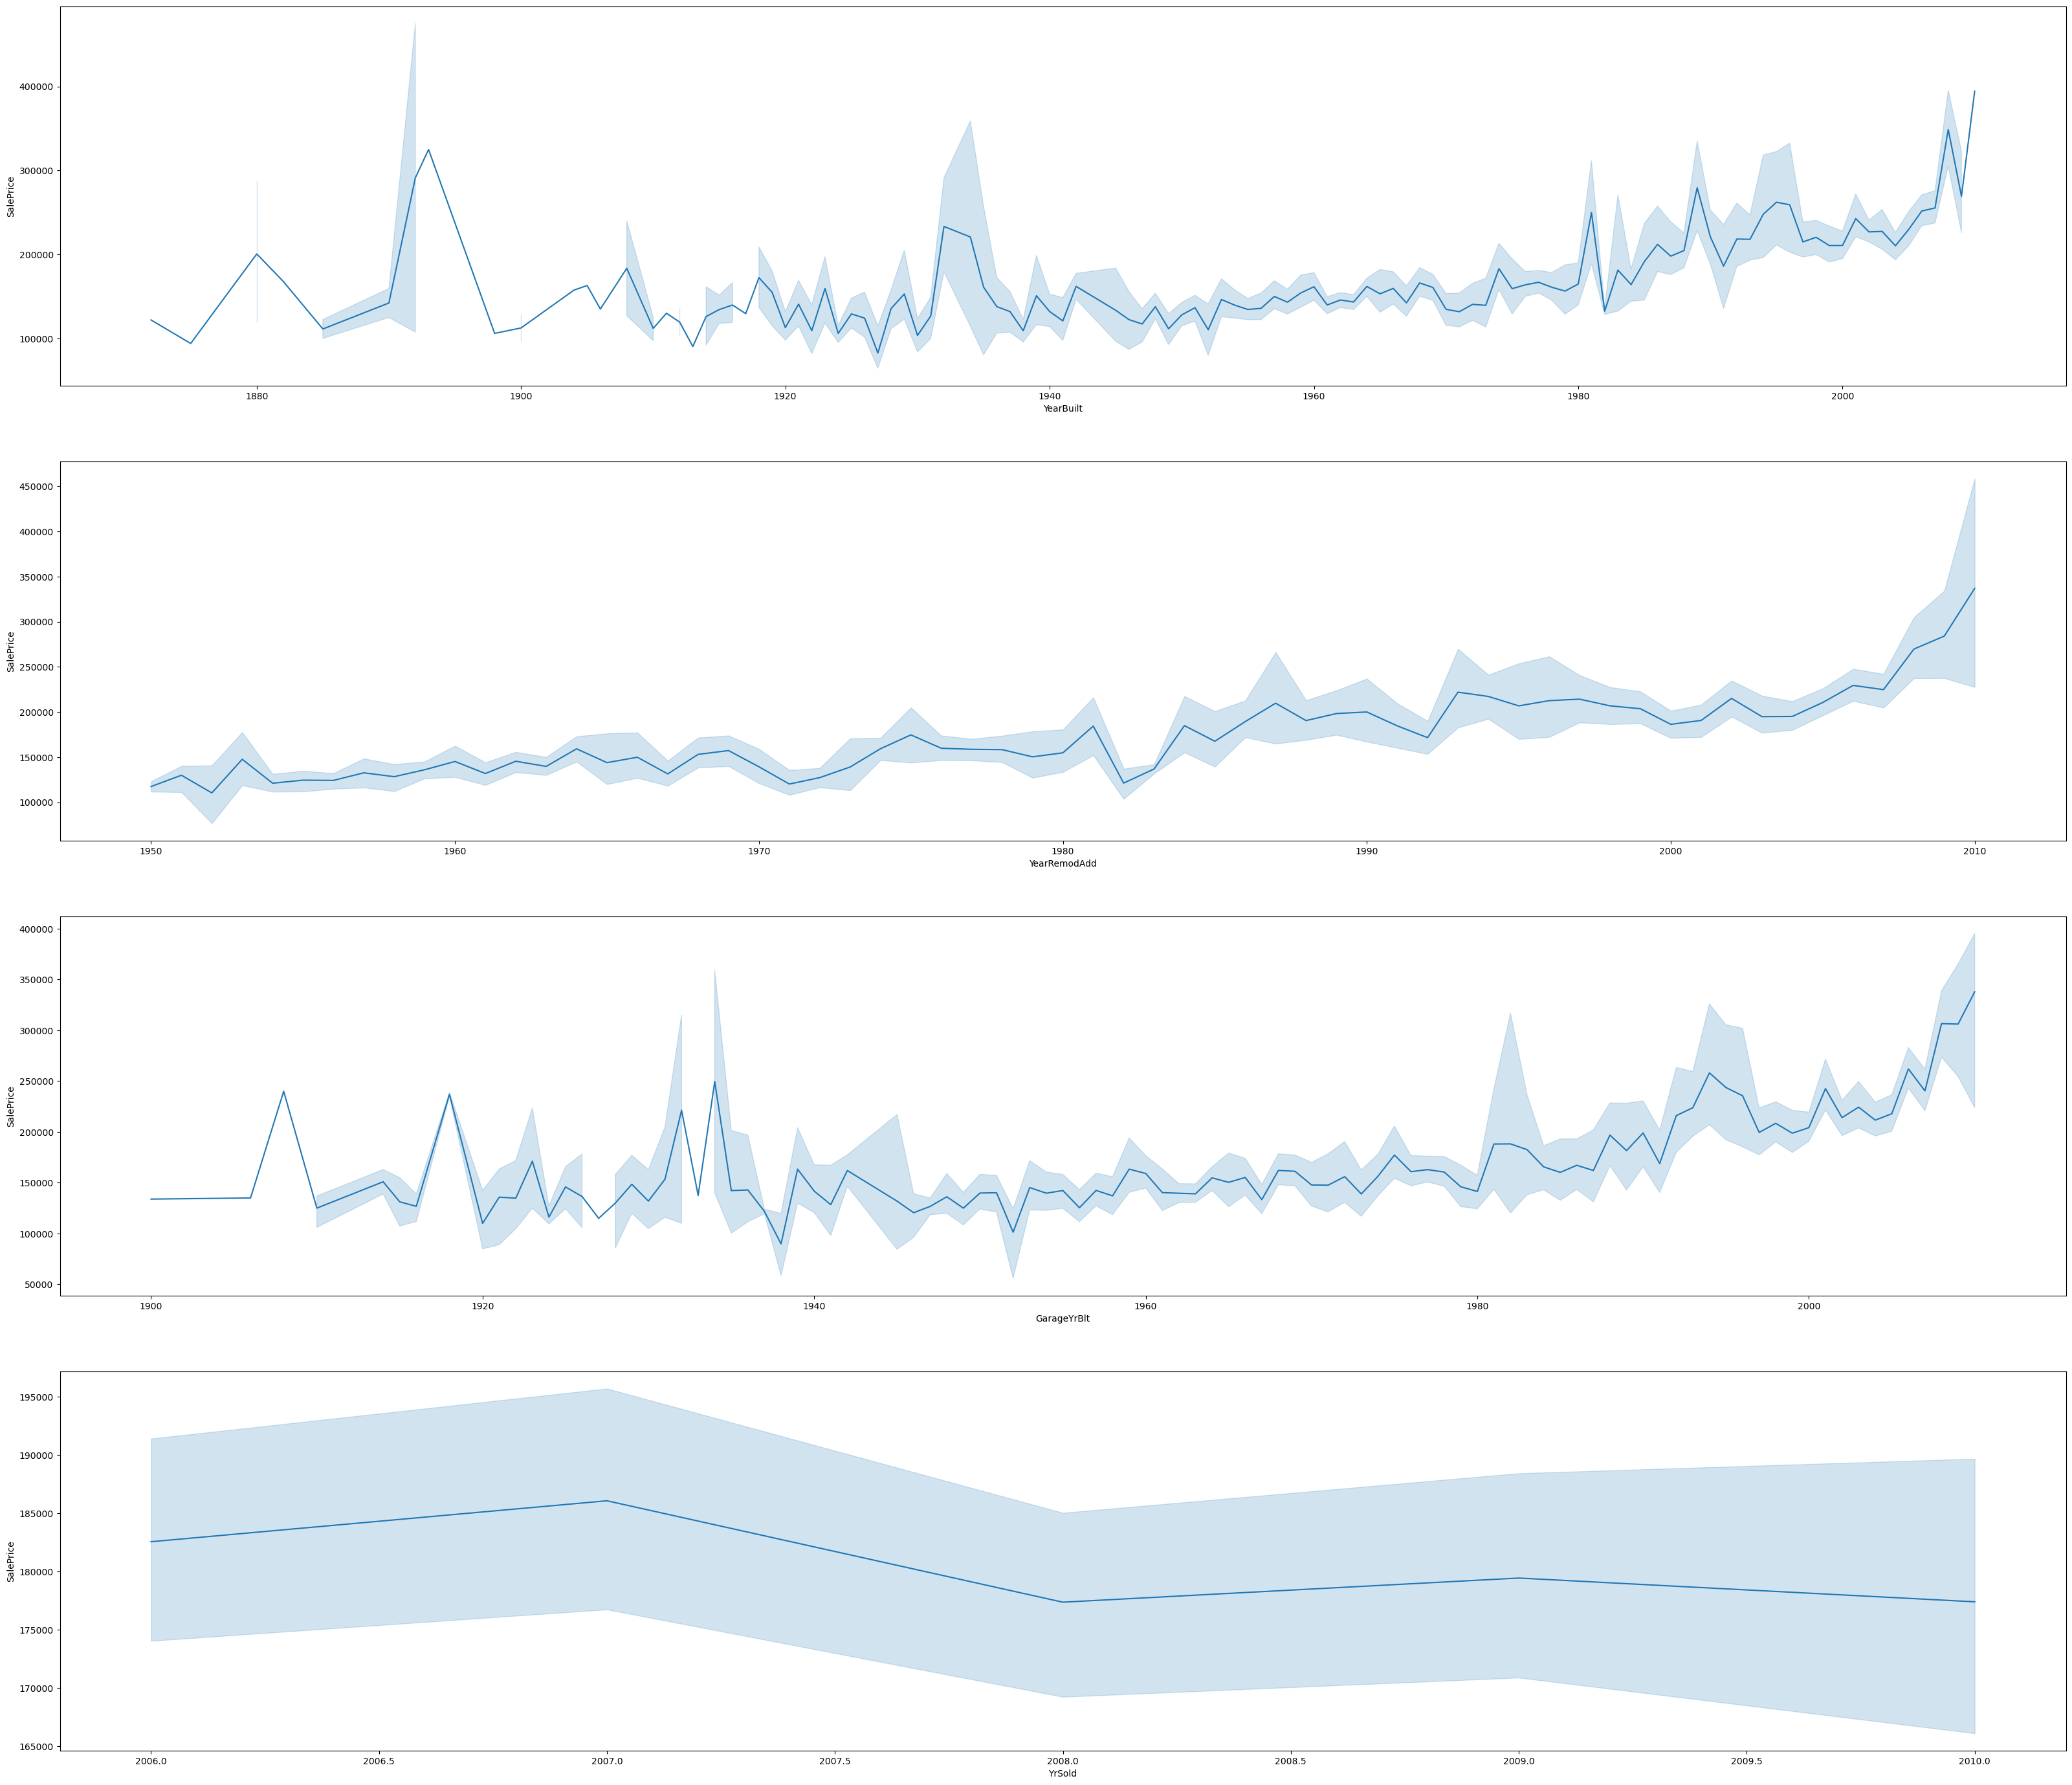

In [15]:
fig, ax = plt.subplots(4, 1, figsize=(40,35))

for r in range(4): 
    sns.lineplot(ax=ax[r], x=time_variable[r], y='SalePrice', data=data)
    
plt.show()

We can see that there's an overall relationship between *SalePrice* and the age of the house. The newer, the more expensive. Interestingly, we also see a spike in very old houses. Perhaps, these houses have historical values attached to them, making them appealling for customers seeking for an older vibe. 

# Preprocessing

Wow! That was already a visualization overload. But it's finally time we move on to the most tedious step of all, data preprocessing. We have a lot of variables, meaning we have a lot of work to do here. Let's get started! First, let's drop the index variable *Id*, which is useless in providing any predictive power.

In [16]:
#drop index variable
data = data.drop('Id', axis=1)

The biggest problem we have to address for this dataset is missing value imputations. I took some insight from [Stacked Regressions : Top 4% on LeaderBoard](http://) by SERIGN for this step, so credits to him/her. I only made some slight modifications to prevent data leakage but the methods remain roughly the same. Let's go through each one by one.

## Missing Values

***MSZoning***: *MSZoning* is categorical variable, so let's impute it with the mode (of the training data to prevent data leakage).

In [17]:
#impute by mode of training data
data['MSZoning'] = data['MSZoning'].fillna(train['MSZoning'].mode()[0])

***LotFrontage***: The area between the street to the house are likely going to be similar within the same neighborhood, so let's compute it with *LotFrontage* median of the neighborhood (of the training data of course).

In [18]:
#impute by neighborhood median
index_NaN_lotF = list(data["LotFrontage"][data["LotFrontage"].isnull()].index)
lotF = []

for i in index_NaN_lotF:
    
    neighbor = data.loc[i,"Neighborhood"]
    impute_median = train.groupby(["Neighborhood"])['LotFrontage'].median()[neighbor]
    
    data.loc[i, 'LotFrontage'] = impute_median

***Alley***: The data description specifies that *NA* means "no alley access".

In [19]:
data["Alley"] = data["Alley"].fillna("None")

***Utlities***: This is a categorical variable with all but one value being *AllPub*. There are also only 2 missing values, so we might as well discard this variable entirely because its likely not going to help us improve the predictive power.

In [20]:
data = data.drop(['Utilities'], axis=1)

***Exterior1st*** and ***Exterior2nd***: Both of these variables only have 1 missing value, so let's impute them with the mode.

In [21]:
data['Exterior1st'] = data['Exterior1st'].fillna(train['Exterior1st'].mode()[0])
data['Exterior2nd'] = data['Exterior2nd'].fillna(train['Exterior2nd'].mode()[0])

***MasVnrType*** and ***MasVnrArea***: NA probably means that there were no masonry veneer for these houses. Let's fill in *0* for the area and *None* for the type.

In [22]:
data["MasVnrType"] = data["MasVnrType"].fillna("None")
data["MasVnrArea"] = data["MasVnrArea"].fillna(0)

***BsmtQual***, ***BsmtCond***, ***BsmtExposure***, ***BsmtFinType1*** and ***BsmtFinType2***:

The missing values for these variables likely mean that the houses have no basements. So let's impute them with the value *None*.

In [23]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    data[col] = data[col].fillna('None')

***BsmtFinSF1***, ***BsmtFinSF2***, ***BsmtUnfSF***, ***TotalBsmtSF***, ***BsmtFullBath*** and ***BsmtHalfBath***:

The missing values for these variables are also likely due to having no basement in the household. Let's impute them with *0*.

In [24]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    data[col] = data[col].fillna(0)

***Electrical***: This variable only has 1 missing value, so let's just impute it with the mode.

In [25]:
data['Electrical'] = data['Electrical'].fillna(train['Electrical'].mode()[0])

***KitchenQual***: This variable also only has 1 missing value, so let's also impute it with the mode.

In [26]:
data['KitchenQual'] = data['KitchenQual'].fillna(train['KitchenQual'].mode()[0])

***Functional***: The data description specifies *NA* as *Typical*.

In [27]:
data["Functional"] = data["Functional"].fillna("Typical")

***FireplaceQu***: The data desciption specifies *NA* as having no fireplace.

In [28]:
data["FireplaceQu"] = data["FireplaceQu"].fillna("None")

***GarageType***, ***GarageFinish***, ***GarageQual*** and ***GarageCond***:

These houses likely do not have a garage, so let's impute them with the value *None*.

In [29]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    data[col] = data[col].fillna('None')

***GarageYrBlt***, ***GarageArea*** and **GarageCars**:

Likewise, these houses likely do not have a garage, so let's impute these missing values with *0*.

In [30]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    data[col] = data[col].fillna(0)

***PoolQC***: The data description specifies *NA* as having no pool.

In [31]:
data["PoolQC"] = data["PoolQC"].fillna("None")

***Fence***: The data description specifies *NA* as having no fence.

In [32]:
data["Fence"] = data["Fence"].fillna("None")

***MiscFeature***: The data description specifies *NA* as having no miscellaneous features.

In [33]:
data["MiscFeature"] = data["MiscFeature"].fillna("None")

***SaleType***: *SaleType* is categorical variable, so we'll impute its missing values with its mode.

In [34]:
data['SaleType'] = data['SaleType'].fillna(train['SaleType'].mode()[0])

Oh wow! That was a lot of imputation, but we did it! We found the appropriate (or at least reasonable) imputation for each and every variable. Let's just double check that we have no more missing values before we move on.

In [35]:
data.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice        1459
Length: 79, dtype: int64

Perfect! Now we can proceed to our next step.

## Log Transformation

Previously, we mentioned that our target variable is skewed. To correct that skewness, let's apply log transformation to the target variable. In fact, let's apply log transformation to all of the numerical variables because many of them are also skewed. But becareful! We have to seperate the data back into training and testing and perform the log transformation seperately to avoid data leakage. This is a step many people often overlook.

In [36]:
#break the data apart into training and testing
train = data.iloc[:len(train)].copy()
test = data.iloc[len(train):].copy()

#scale target variable seperately to prevent data leakage
train["SalePrice"] = np.log1p(train["SalePrice"])
test["SalePrice"] = np.log1p(test["SalePrice"])

#scale numerical variables too
train[numerical_variables] = np.log1p(train[numerical_variables])
test[numerical_variables] = np.log1p(test[numerical_variables])

## Scale Time Variables

It's important not to forget the time variables. After we've transformed the numerical variables, the time variables will be on a totally different scale as the rest of the variables. So we should also scale these variables as well. We'll apply the MinMaxScaler so that we accurately preserve the age information represented by the time variables.

In [37]:
minmax = MinMaxScaler()

train[time_variable] = minmax.fit_transform(train[time_variable])
test[time_variable] = minmax.transform(test[time_variable])

## Encoding

After we have scaled our numerical data, let's concatenate the training and testing data back again to encode the categorical (and ordinal) variables. This way we can assure that the dummy variables are encoded consistently across the training and testing dataset.

In [38]:
#concatenate training and test back again
data = pd.concat(objs=[train, test], axis=0).reset_index(drop=True)
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,4.189655,9.042040,Pave,None,Reg,Lvl,Inside,Gtl,...,0.0,None,None,None,0.000000,2,0.50,WD,Normal,12.247699
1,20,RL,4.394449,9.169623,Pave,None,Reg,Lvl,FR2,Gtl,...,0.0,None,None,None,0.000000,5,0.25,WD,Normal,12.109016
2,60,RL,4.234107,9.328212,Pave,None,IR1,Lvl,Inside,Gtl,...,0.0,None,None,None,0.000000,9,0.50,WD,Normal,12.317171
3,70,RL,4.110874,9.164401,Pave,None,IR1,Lvl,Corner,Gtl,...,0.0,None,None,None,0.000000,2,0.00,WD,Abnorml,11.849405
4,60,RL,4.442651,9.565284,Pave,None,IR1,Lvl,FR2,Gtl,...,0.0,None,None,None,0.000000,12,0.50,WD,Normal,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,3.091042,7.568896,Pave,None,Reg,Lvl,Inside,Gtl,...,0.0,None,None,None,0.000000,6,0.00,WD,Normal,NaN
2915,160,RM,3.091042,7.546974,Pave,None,Reg,Lvl,Inside,Gtl,...,0.0,None,None,None,0.000000,4,0.00,WD,Abnorml,NaN
2916,20,RL,5.081404,9.903538,Pave,None,Reg,Lvl,Inside,Gtl,...,0.0,None,None,None,0.000000,9,0.00,WD,Abnorml,NaN
2917,85,RL,4.143135,9.253591,Pave,None,Reg,Lvl,Inside,Gtl,...,0.0,None,MnPrv,Shed,6.552508,7,0.00,WD,Normal,NaN


## Categorical Encoding

*MSSubClass* has an incorrect datatype, so let's make sure that's a string first. Then, we encode.

In [39]:
#change MSSubClass to categorical
data['MSSubClass'] = data['MSSubClass'].apply(str)

#create dummy variables on categorical variables (notice we already removed Utilities)
categorical_variables.remove("Utilities")

cat_variables = data[categorical_variables]
cat_dummies = pd.get_dummies(cat_variables, drop_first=True, dtype=int)

data = data.drop(categorical_variables, axis=1)
data = pd.concat([data, cat_dummies], axis=1)

data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None
0,4.189655,9.042040,7,5,0.949275,0.883333,5.283204,Gd,TA,Gd,...,1,0,0,0,1,0,0,0,0,1
1,4.394449,9.169623,6,8,0.753623,0.433333,0.000000,TA,TA,Gd,...,1,0,0,0,1,0,0,0,0,1
2,4.234107,9.328212,7,5,0.934783,0.866667,5.093750,Gd,TA,Gd,...,1,0,0,0,1,0,0,0,0,1
3,4.110874,9.164401,7,5,0.311594,0.333333,0.000000,TA,TA,TA,...,1,0,0,0,0,0,0,0,0,1
4,4.442651,9.565284,8,5,0.927536,0.833333,5.860786,Gd,TA,Gd,...,1,0,0,0,1,0,0,0,0,1


## Ordinal Encoding

For the ordinal variables, we'll encode them manually since they each have very different scales. 

In [40]:
#define encoding
cat_encoding_1 = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
cat_encoding_2 = {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
cat_encoding_3 = {'None': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}
cat_encoding_4 = {'None': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}
pool = {'None': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}

#encode ordinal variables
data['ExterQual'] = data['ExterQual'].replace(cat_encoding_1)
data['ExterCond'] = data['ExterCond'].replace(cat_encoding_1)

data['BsmtQual'] = data['BsmtQual'].replace(cat_encoding_2)
data['BsmtCond'] = data['BsmtCond'].replace(cat_encoding_2)
data['BsmtExposure'] = data['BsmtExposure'].replace(cat_encoding_3)
data['BsmtFinType1'] = data['BsmtFinType1'].replace(cat_encoding_4)
data['BsmtFinType2'] = data['BsmtFinType2'].replace(cat_encoding_4)

data['HeatingQC'] = data['HeatingQC'].replace(cat_encoding_1)

data['KitchenQual'] = data['KitchenQual'].replace(cat_encoding_1)

data['FireplaceQu'] = data['FireplaceQu'].replace(cat_encoding_2)

data['GarageQual'] = data['GarageQual'].replace(cat_encoding_2)
data['GarageCond'] = data['GarageCond'].replace(cat_encoding_2)

data['PoolQC'] = data['PoolQC'].replace(pool)

data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None
0,4.189655,9.042040,7,5,0.949275,0.883333,5.283204,4,3,4,...,1,0,0,0,1,0,0,0,0,1
1,4.394449,9.169623,6,8,0.753623,0.433333,0.000000,3,3,4,...,1,0,0,0,1,0,0,0,0,1
2,4.234107,9.328212,7,5,0.934783,0.866667,5.093750,4,3,4,...,1,0,0,0,1,0,0,0,0,1
3,4.110874,9.164401,7,5,0.311594,0.333333,0.000000,3,3,3,...,1,0,0,0,0,0,0,0,0,1
4,4.442651,9.565284,8,5,0.927536,0.833333,5.860786,4,3,4,...,1,0,0,0,1,0,0,0,0,1


In [41]:
data[numerical_variables]

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,4.189655,9.042040,5.283204,6.561031,0.0,5.017280,6.753438,6.753438,6.751101,0.0,...,0.000000,1.098612,6.308098,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.000000
1,4.394449,9.169623,0.000000,6.886532,0.0,5.652489,7.141245,7.141245,0.000000,0.0,...,0.693147,1.098612,6.133398,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.000000
2,4.234107,9.328212,5.093750,6.188264,0.0,6.075346,6.825460,6.825460,6.765039,0.0,...,0.693147,1.098612,6.411818,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.000000
3,4.110874,9.164401,0.000000,5.379897,0.0,6.293419,6.629363,6.869014,6.629363,0.0,...,0.693147,1.386294,6.466145,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.000000
4,4.442651,9.565284,5.860786,6.486161,0.0,6.196444,7.044033,7.044033,6.960348,0.0,...,0.693147,1.386294,6.729824,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,3.091042,7.568896,0.000000,0.000000,0.0,6.304449,6.304449,6.304449,6.304449,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
2915,3.091042,7.546974,0.000000,5.533389,0.0,5.686975,6.304449,6.304449,6.304449,0.0,...,0.000000,0.693147,5.659482,0.000000,3.218876,0.000000,0.0,0.0,0.0,0.000000
2916,5.081404,9.903538,0.000000,7.110696,0.0,0.000000,7.110696,7.110696,0.000000,0.0,...,0.693147,1.098612,6.357842,6.163315,0.000000,0.000000,0.0,0.0,0.0,0.000000
2917,4.143135,9.253591,0.000000,5.823046,0.0,6.356108,6.816736,6.878326,0.000000,0.0,...,0.000000,0.000000,0.000000,4.394449,3.496508,0.000000,0.0,0.0,0.0,6.552508


Awesome! That should conclude our data preprocessing stage. We are finally ready to build our models. We covered quite a lot, so take a deep breath if you need and let's end this thing strong!

# Train-test-split

We'll split our dataset back into our training and testing dataset for the final time. 

In [42]:
#split data back into training and testing dataset
train_data = data.iloc[:len(train)]
test_data = data.iloc[len(train):]

print(train.shape, test.shape)
print(train_data.shape, test_data.shape)

(1460, 79) (1459, 79)
(1460, 231) (1459, 231)


And we'll also seperate our X and y variables, so that they can be fed into our models. Now, it's building time!

In [43]:
#split training data into X and y
y_train = train_data[['SalePrice']]
X_train = train_data[train_data.columns[train_data.columns!='SalePrice']]

# Model Building

Our ultimate goal is to predict the numerical variable *SalePrice*, using various regression models. There are many popular regression algorithms, such as `DecisionTreeRegressor`, `RandomForestRegressor`, `SupportVectorRegressor`, and deep learning neural networks, that we will not be covering in this notebook. Instead, we will focus on building linear regression, linear regression with regularization, and XGBoost models. However, you are welcome to explore additional algorithms on your own. Additionally, we will perform **model stacking** at the end of the notebook to demonstrate its effectiveness.

First, let's define our cross validation method. For a regression task like this, we'll use **KFold cross validation**.

In [44]:
cv = KFold(n_splits=5)

## Linear Regression

We'll begin by constructing the most basic linear regression model. This will serve as our baseline model for comparison with the more sophisticated models.

In [45]:
#instantiate linear regression
linear = LinearRegression()

#perform cv
linear_scores = cross_val_score(linear, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# summarize results
print('neg_MAE: %.3f (%.3f)' % (np.mean(linear_scores), np.std(linear_scores)))

neg_MAE: -0.092 (0.004)


Not too bad for a baseline model, but let's see if we can do better with some sophisticated models.

## Lasso Regression

**Lasso Regression** sounds like a pretty good choice considering the high number of variables we have in this dataset. For those unfamiliar with lasso regression, lasso regression works by adding a penalty term to the cost function of linear regression, which shrinks the coefficients of less important predictors to zero. In other words, it's another form of feature selection and works well with datasets of many variables. We'll also finetune the optimal penalty term (*alpha*) using `GridSearchCV`. Let's see what we can achieve here.

In [46]:
#instantiate lasso regression
lasso = Lasso()

#grid search parameters
lasso_grid = {'alpha':[0.0005, 0.001, 0.005, 0.01]}

#grid search
lasso_grid_search = GridSearchCV(lasso, param_grid=lasso_grid, n_jobs=-1, cv=cv, scoring='neg_mean_absolute_error', verbose=1)

lasso_grid_result = lasso_grid_search.fit(X_train,y_train)

lasso_best = lasso_grid_result.best_estimator_

#summarize results
print("Best: %f using %s" % (lasso_grid_result.best_score_, lasso_grid_result.best_params_))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


Best: -0.085126 using {'alpha': 0.001}


Great! It was an improvement from linear regression! According to the cross validation result, the model performed best when *alpha* is set as 0.001. Let's see which variables Lasso regression retained when `alpha = 0.001` (check out which variables still has a coefficient that wasn't reduced to zero).

<Axes: >

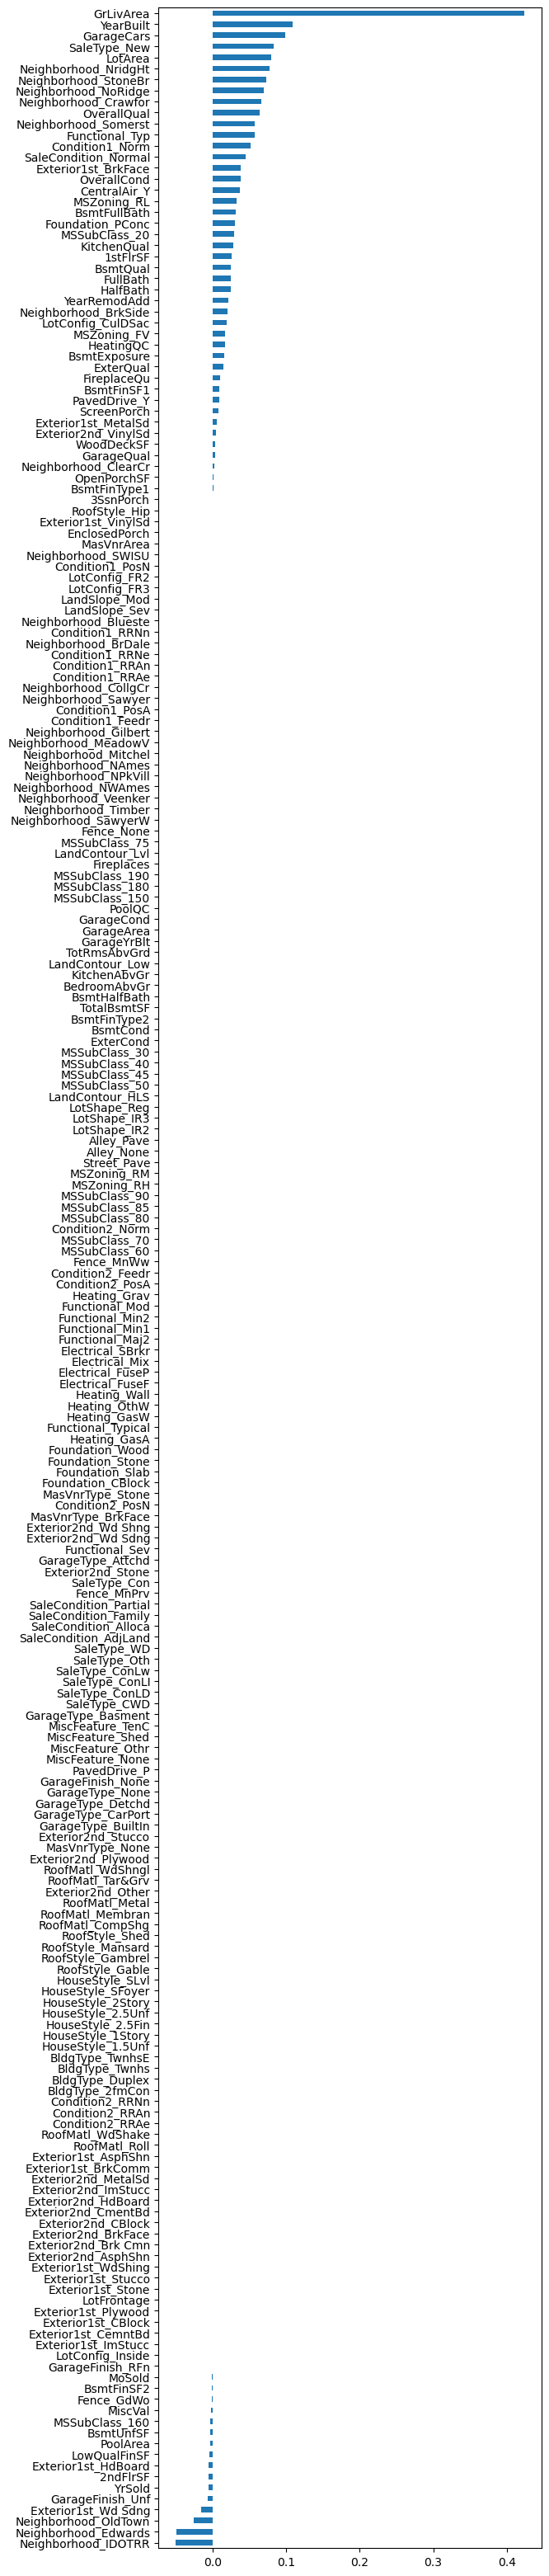

In [47]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)
coef = pd.Series(lasso.coef_, index = X_train.columns)

fig, ax = plt.subplots(figsize=(6, 40))
coef.sort_values().plot(kind='barh')

Wow! The coefficient for most the variables were cut to 0. We went from 200+ variables to around 60ish variables. Let's save these important variables retained by lasso regression for later.

In [48]:
#save variables retained by lasso regression
lasso_variables = list(coef[coef!=0].sort_values(ascending=False).index)
X_train_lasso = X_train[lasso_variables]

In [49]:
#from 230 variables to just 63
print(X_train.shape, X_train_lasso.shape)

(1460, 230) (1460, 67)


## Ridge Regression

Lasso regression is just one of the regularization techniques used to prevent overfitting in linear regression models. The other one is called **Ridge Regression**. Both Lasso and Ridge regression applies a penalty term to the cost function of the linear regression. The difference is that Lasso adds a penalty term that is equal to the absolute value of the coefficient, while Ridge adds a penalty term that is equal to the square of the coefficients. Therfore, some coefficients in Lasso gets reduced to zero, while coefficients in Ridge are not. 

In general, Lasso regression is preferred when there are many predictors and it is suspected that only a subset of them are important, while Ridge regression is preferred when there are many predictors with similar importance and it is important to keep all of them in the model. The choice between the two methods ultimately depends on the specific problem and the characteristics of the dataset.

In [50]:
#instantiate ridge regression
ridge = Ridge()

#grid search parameters
ridge_grid = {'alpha':[7, 8, 9, 10]}

#grid search
ridge_grid_search = GridSearchCV(ridge, param_grid=ridge_grid, n_jobs=-1, cv=cv, scoring='neg_mean_absolute_error', verbose=1)

ridge_grid_result = ridge_grid_search.fit(X_train,y_train)

ridge_best = ridge_grid_result.best_estimator_

#summarize results
print("Best: %f using %s" % (ridge_grid_result.best_score_, ridge_grid_result.best_params_))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best: -0.086234 using {'alpha': 8}


The performance of Ridge is slightly worse than that of Lasso. This makes sense since we're dealing with many variables, many of which probably contribute little predictive power.

## ElasticNet

Finally, we have our **ElasticNet** as our final regularization technique used in linear regression. ElasticNet combines the penalties of Lasso and Ridge regression, resulting a model that has the advantages of both methods. We can set the `l1_ratio` argument in ElasticNet to control the balance between L1 (Lasso) and L2 (Ridge) penalties added to the cost function. When `l1_ratio=0`, ElasticNet is reduced to Ridge Regression, and when `l1_ratio=1`, ElasticNet is reduced to Lasso Regression. 

In [51]:
#instantiate ElasticNet
elastic = ElasticNet(random_state=42)

#gridsearch parameters
elastic_grid = {'alpha':[0.0005, 0.001, 0.005, 0.01],
               'l1_ratio':[0, 0.25, 0.5, 0.75, 1],
               'max_iter':[500000],
               'tol': [0.05]}

#gridsearch
elastic_grid_search = GridSearchCV(elastic, param_grid=elastic_grid, n_jobs=-1, cv=cv, scoring='neg_mean_absolute_error', verbose=1)

elastic_grid_result = elastic_grid_search.fit(X_train,y_train)

elastic_best = elastic_grid_result.best_estimator_

#summarize results
print("Best: %f using %s" % (elastic_grid_result.best_score_, elastic_grid_result.best_params_))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best: -0.085191 using {'alpha': 0.001, 'l1_ratio': 0.75, 'max_iter': 500000, 'tol': 0.05}


As we can see, the results of ElasticNet is the best out of all three regularization techniques. This makes sense since ElasticNet is really just a combination of the other two. The `max_iter` and `tol` arguments are set to ensure that the model converges.

## XGBoost

For our final model, let's build something a little bit different, **XGBoost** (**Extreme Gradient Boosting**). XGBoost is a popular machine learning alogrithm known for its performance, flexibility (can be used for both regression and classification) and built-in regularization. It is even optimized for parallel computing, so we can run it on GPU to speed up the processing time. If you're interested in how the algorithm works, I recommend you to watch [Statquest by Josh Starmer](http://https://www.youtube.com/watch?v=OtD8wVaFm6E). His explanations on XGBoost is just amazing.

Anyways, there's quite a lot of parameters that we can tune with XGBoost, so training might take a while with `GridSearchCV`. Therefore, let's opt for `RandomizedSearchCV`. While `RandomizedSearchCV` may not allow us to find the best set of hyperparameters, it will save us a lot of time. The parameters in which we'll tune are as follow:

- `n_estimators`: This parameter controls the number of trees in the ensemble, which is tuned to find the optimal balance between model performance and complexity.
- `max_depth`: This parameter controls the maximum depth of the individual trees in the ensemble. Increasing max_depth can improve model performance, but may also lead to overfitting.
- `learning_rate`: This parameter controls the step size at each iteration while moving toward a minimum of a loss function. A smaller learning rate generally results in a more accurate model, but requires more iterations to converge.
- `subsample`: This parameter controls the fraction of the training data that is used to train each tree in the ensemble. Setting subsample to a value less than 1 can help to prevent overfitting.
- `colsamples_bytree`: This parameter controls the fraction of the features that are used to train each tree in the ensemble. Setting colsample_bytree to a value less than 1 can help to prevent overfitting.
- `gamma`: This parameter controls the minimum reduction in the loss function required to split a node during tree construction. Increasing gamma can lead to fewer and more conservative splits.
- `reg_alpha` and `reg_lambda`: These parameters control L1 and L2 regularization, respectively. They can be used to prevent overfitting and improve model generalization.

In [52]:
#instantiate XGBoost and set tree_method to run it on gpu and random_state for reproducibility
xgb = xgboost.XGBRegressor(random_state=42)

#hyperparameter tuning
xgb_grid = {'n_estimators':[1000, 2000],
            'max_depth': [4, 5],
            'learning_rate': [0.05, 0.01],
            'subsample': [0.5, 0.7, 1.0],
            'colsample_bytree': [0.5, 0.7, 1.0],
            'gamma': [0, 0.1, 0.5],
            'reg_alpha': [0, 0.1, 0.5],
            'reg_lambda': [0, 0.1, 0.5]
           }

#randomizedsearch with random_state for reproducibility
xgb_random_search = RandomizedSearchCV(estimator=xgb, 
                                       param_distributions=xgb_grid, 
                                       n_iter=100, 
                                       cv=cv, 
                                       scoring='neg_mean_absolute_error', 
                                       verbose=1, 
                                       random_state=42)

xgb_grid_result = xgb_random_search.fit(X_train,y_train)

#best xgboost model
xgb_best = xgb_grid_result.best_estimator_

#summarize results
print("Best: %f using %s" % (xgb_grid_result.best_score_, xgb_grid_result.best_params_))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best: -0.080006 using {'subsample': 0.5, 'reg_lambda': 0, 'reg_alpha': 0, 'n_estimators': 2000, 'max_depth': 4, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.5}


Look at that! The performance by our XGBoost model exceeded that of our linear regression models. Of the one hundred different combinations of hyperparameters that we tried, the best one is printed out in the output. Now, let's try something a little bit different. Instead of fitting XGBoost using all of the X variables, let's fit it using the variables retained by Lasso regression.

In [53]:
#xgboost on lasso variables
xgb_lasso_scores = cross_val_score(xgb_best, X_train_lasso, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

print(xgb_lasso_scores)
print('Accuracy: %.6f (%.6f)' % (np.mean(xgb_lasso_scores), np.std(xgb_lasso_scores)))

[-0.07768208 -0.08190576 -0.08042548 -0.07609048 -0.07944955]
Accuracy: -0.079111 (0.002041)


Woohoo! Another improvement! We're making steady progress. Let's formally fit and train these two XGBoost models.

In [54]:
#fit xgboost using all X variables
xgb_og = xgboost.XGBRegressor(**xgb_best.get_params())
xgb_og.fit(X_train, y_train)

#fit xgboost using lasso X variables
xgb_lasso = xgboost.XGBRegressor(**xgb_best.get_params())
xgb_lasso.fit(X_train_lasso, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

# Stacking

Okay! We're finally onto our last stage of model building, **stacking**. Essentially, stacking combines all of these regression models into one final ultimate model. You can view the `StackingRegressor` as another Ridge Regression (by default), except this time the variables are the estimators (regression models). Through cross validation, it will find the optimal penalty term (*alpha*) and calculate the coefficient for each estimator (how much each estimator should contribute to the final prediction). Let's list out the four estimators that we built in this notebook.

In [55]:
#the four estimators with their best performing hyperparameters
estimators = [('lasso', Lasso(**lasso_best.get_params())),
              ('ridge', Ridge(**ridge_best.get_params())),
              ('elastic', ElasticNet(**elastic_best.get_params())),
              ('xgboost', xgboost.XGBRegressor(**xgb_best.get_params()))]

We will build two `StackingRegressor`s, one on all of the variable and the other on the variables retained by Lasso regression. We've already seen that models typically perform better with the variables retained by Lasso regression. Let's see if they will perform better than the other models with cross validation.

In [56]:
#stacking using all X variables
stack = StackingRegressor(estimators=estimators, cv=cv)
stack_scores = cross_val_score(stack, X_train, y_train.values.ravel(), scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

print(stack_scores)
print('Accuracy: %.6f (%.6f)' % (np.mean(stack_scores), np.std(stack_scores)))

[-0.07582731 -0.08038013 -0.07885525 -0.07552849 -0.08099662]
Accuracy: -0.078318 (0.002267)


In [57]:
#stacking using only lasso variables
stack_lasso = StackingRegressor(estimators=estimators, cv=cv)
stack_lasso_scores = cross_val_score(stack_lasso, X_train_lasso, y_train.values.ravel(), scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

print(stack_lasso_scores)
print('Accuracy: %.6f (%.6f)' % (np.mean(stack_lasso_scores), np.std(stack_lasso_scores)))

[-0.07529859 -0.07889872 -0.07545256 -0.07467226 -0.08008053]
Accuracy: -0.076881 (0.002179)


Once again, the model that used the variables retained by Lasso regression performed better. This `StackingRegressor` using the Lasso variables will serve as our final model. Let's fit the model and use it to make predictions on our testing dataset.

In [58]:
#fitting StackingRegressor on lasso variables
stack_lasso = StackingRegressor(estimators=estimators, cv=cv)
stack_lasso.fit(X_train_lasso, y_train.values.ravel())

#get X variable on testing dataset
X_test = test_data[test_data.columns[test_data.columns!='SalePrice']]

#obtain prediction by StackingRegressor on lasso variables
stack_lasso_pred = stack_lasso.predict(X_test[lasso_variables])

# Submission

In our final step of the notebook, we replace the predictions in the *sample_submission.csv* file with our own predictions. Please do remember that we have to transform our prediction values one last time using `np.expm1` to reverse the log transformation that we performed during the data preprocessing stage.

In [59]:
submission = pd.read_csv("../data/sample_submission.csv")
submission['SalePrice'] = np.expm1(stack_lasso_pred)
submission.to_csv('submission.csv', index=False)

# Conclusion

Our final submission achieved a score of 0.11751, which ranks us at 115 out of 4710 submission in total (at the time of my submission) on the public leaderboard. This is fascinating performance especially when you consider that most top submissions are achieved using leaked answers. What's even more amazing is that our model can be improved even further by building and integrating many other algorithms and hyperparameter tuning. We've only tried a limited amount of models in this notebook, so there's definitely more room for improvement. Anyways, I hope you enjoyed this notebook and please upvote and share! Cheers <3